<a href="https://colab.research.google.com/github/ihebakermi10/Prediction-ds/blob/main/Global_active_power_linear_regression_tenserflow_iheb_akermi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#iheb akermi 3 GII SSE

# part 1
# part 2
#part 3

#Part 1 : linear regession

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,LSTM
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_excel("/content/power.xlsx")
df.head(1000)

,Unnamed: 0,datetime,Global_active_power
0,0,2006-12-16 17:00:00,152.024
1,1,2006-12-16 18:00:00,217.932
2,2,2006-12-16 19:00:00,204.014
3,3,2006-12-16 20:00:00,196.114
4,4,2006-12-16 21:00:00,183.388
...,...,...,...
995,995,2007-01-27 04:00:00,17.412
996,996,2007-01-27 05:00:00,17.104
997,997,2007-01-27 06:00:00,31.920
998,998,2007-01-27 07:00:00,91.912


In [ ]:
def load_data(data, seq_len, column_index ):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 2:3])
        y.append(data.iloc[i, 2:3])
    return np.array(x), np.array(y)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
training_size = int(len(df)*0.8)

x, y = load_data(df, 20, 3)

x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

reg = LinearRegression().fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred = reg.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
reg

LinearRegression()

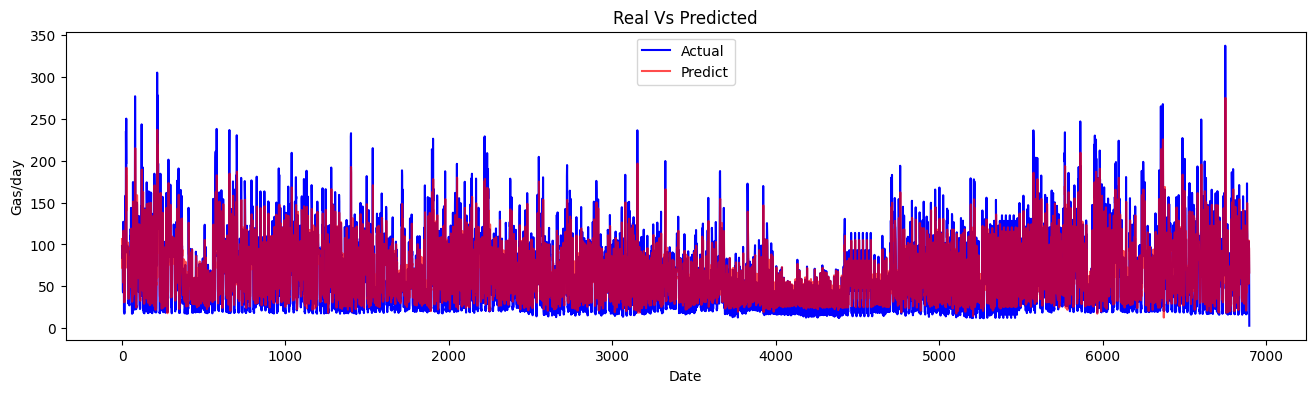

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Gas/day')
plt.legend()
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
# Exclude zero values
mask = y_test != 0
mape = np.round(np.mean(np.abs(y_test[mask]-y_pred[mask])/y_test[mask])*100,2)

#mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 32.02
MAPE: 54.32


# part 2 : Tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming x_train and y_train are your training data
# Ensure that both x_train and y_train are of dtype float32
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

model = Sequential()
model.add(Dense(40, input_shape=(20, ), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=2)

# Predictions
y_pred = model.predict(x_test)




Epoch 1/10
13836/13836 - 25s - loss: 1497.9387 - 25s/epoch - 2ms/step
Epoch 2/10
13836/13836 - 23s - loss: 1409.1096 - 23s/epoch - 2ms/step
Epoch 3/10
13836/13836 - 23s - loss: 1384.2983 - 23s/epoch - 2ms/step
Epoch 4/10
13836/13836 - 24s - loss: 1366.9275 - 24s/epoch - 2ms/step
Epoch 5/10
13836/13836 - 22s - loss: 1359.4905 - 22s/epoch - 2ms/step
Epoch 6/10
13836/13836 - 23s - loss: 1351.0854 - 23s/epoch - 2ms/step
Epoch 7/10
13836/13836 - 23s - loss: 1342.7477 - 23s/epoch - 2ms/step
Epoch 8/10
13836/13836 - 22s - loss: 1335.9060 - 22s/epoch - 2ms/step
Epoch 9/10
13836/13836 - 22s - loss: 1332.7146 - 22s/epoch - 2ms/step
Epoch 10/10
13836/13836 - 23s - loss: 1333.2225 - 23s/epoch - 2ms/step
216/216 [==============================] - 0s 1ms/step


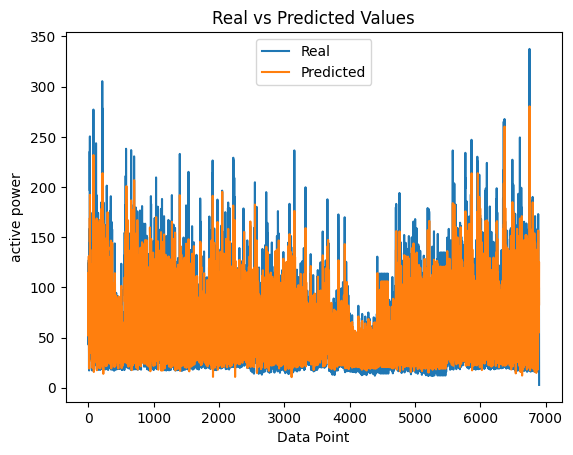

In [ ]:
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicted')
plt.title('Real vs Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('active power')
plt.legend()
plt.show()

#Part 3 : network ||

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
data=pd.read_excel("/content/power.xlsx")
data.head()
# Séparer les données en fonction des caractéristiques et de la variable cible
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['year'] = data['datetime'].dt.year

X = data[['hour', 'month', 'day', 'year']]
y = np.log1p(data['Global_active_power'])

# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Créer le modèle de réseau neuronal avec des ajustements
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)  # Change this to 1 because you have one target variable
])

# Compiler le modèle avec un taux d'apprentissage ajusté
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Entraîner le modèle avec un nombre d'époques plus élevé
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss = model.evaluate(X_test, y_test)
print(f'Loss sur l\'ensemble de test : {loss}')

Epoch 1/100
692/692 [==============================] - 4s 4ms/step - loss: 0.0305 - val_loss: 0.0241
Epoch 2/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0254 - val_loss: 0.0237
Epoch 3/100
692/692 [==============================] - 2s 2ms/step - loss: 0.0250 - val_loss: 0.0241
Epoch 4/100
692/692 [==============================] - 2s 2ms/step - loss: 0.0248 - val_loss: 0.0231
Epoch 5/100
692/692 [==============================] - 2s 2ms/step - loss: 0.0248 - val_loss: 0.0230
Epoch 6/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0230
Epoch 7/100
692/692 [==============================] - 2s 4ms/step - loss: 0.0247 - val_loss: 0.0224
Epoch 8/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0245 - val_loss: 0.0224
Epoch 9/100
692/692 [==============================] - 2s 2ms/step - loss: 0.0244 - val_loss: 0.0224
Epoch 10/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0244 - val_lo

217/217 [==============================] - 0s 1ms/step


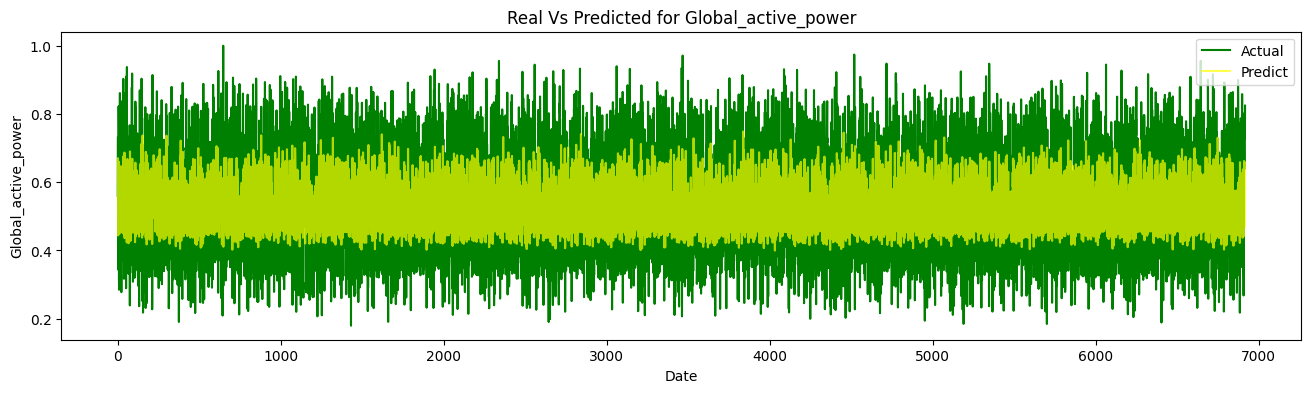

In [ ]:
y_pred_m = model.predict(X_test)

# Convertir y_test et y_pred en DataFrame pour faciliter l'accès aux colonnes
y_test_df = pd.DataFrame(y_test, columns=['Global_active_power'])
y_pred_df = pd.DataFrame(y_pred_m, columns=['Global_active_power'])

# Afficher les valeurs réelles et prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(y_test_df['Global_active_power'], color='green', label='Actual')
plt.plot(y_pred_df['Global_active_power'], alpha=0.7, color='yellow', label='Predict')
plt.title('Real Vs Predicted for Global_active_power')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()
